In [8]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [13]:
train_df = pd.read_csv(DATASET_DIR + "/train_df.csv", keep_default_na=False)
train_df_ohe_full = pd.read_csv(DATASET_DIR + "/train_df_ohe_full.csv", keep_default_na=False)
train_df_ohe_selected = pd.read_csv(DATASET_DIR + "/train_df_ohe_selected.csv", keep_default_na=False)
train_df_oe = pd.read_csv(DATASET_DIR + "/train_df_oe.csv", keep_default_na=False)

In [29]:
y = train_df.iloc[:,-1]

X = train_df.iloc[:,:-1]
X_ohe_full = train_df_ohe_full.iloc[:,:-1]
X_ohe_selected = train_df_ohe_selected.iloc[:,:-1]
X_oe = train_df_oe.iloc[:,:-1]

# Kernel SVM

In [18]:
from sklearn import svm

### Kernel

In [26]:
# Try with Kernel SVM
RBF_svm = svm.SVC(kernel='rbf')

# tune hyperparameter C and gamma
param_grid = {'C': range(1, 101, 25), 'gamma': [0.1, 0.3, 0.5, 0.7, 0.9]}
tune_hyperparameter(RBF_svm, param_grid, X_ohe_full, y, cv=2)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
RBF_svm = svm.SVC(kernel='rbf', gamma=0.3, C=1)
RBF_svm.fit(X_ohe_full, y_train)
cv_evaluate(RBF_svm, X_ohe_full, y)
# Kernel SVM performs slightly better on weighted avg precision & recall than Linear SVM

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='sag') # uses Stochastic Average Gradient descent solver

In [ ]:
param_grid = {'max_iter': [100, 500, 1000, 5000, 10000]}
cv_results = tune_hyperparameter(logr, param_grid, X_ohe_selected, y, cv=3)
cv_results
# max_iter>=500 works well

In [ ]:
logr = LogisticRegression(solver='sag', max_iter=100)
logr.fit(X_ohe_selected, y)
cv_evaluate(logr, X_ohe_selected, y)

# Boosting with Decision Trees

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=30027)

In [ ]:
# Tuning using GridSearch
param_grid = {
    'learning_rate': (0.01, 0.1, 1, 10),
    'max_leaf_nodes': (3, 10, 30)}
cv_results = tune_hyperparameter(hgb, param_grid, X_oe, y, cv=5)
cv_results
# 'Best' param set: learning_rate = 0.1, max_leaf_nodes = 10

In [ ]:
# 2nd go
hgb = HistGradientBoostingClassifier(random_state=30027, learning_rate=0.1)
param_grid = {
    'max_leaf_nodes': range(10, 30, 2)}
cv_results = tune_hyperparameter(hgb, param_grid, X_oe, y, cv=5)
cv_results
# 'Best' param set: learning_rate = 0.01, max_leaf_nodes = 10

In [ ]:
hgb = HistGradientBoostingClassifier(random_state=30027, max_leaf_nodes=22, learning_rate=0.1)
hgb.fit(X_oe, y)
cv_evaluate(hgb, X_oe, y)

# Baseline - 0R & 1R

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

DummyClassifier prediction took 0.49511194229125977 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0                0.0           0.825356                0.0       0.702644
1                0.0           0.825356                0.0       0.702644
2                0.0           0.825356                0.0       0.702644
3                0.0           0.825567                0.0       0.702949
4                0.0           0.825567                0.0       0.702949
5                0.0           0.825567                0.0       0.702949
6                0.0           0.825567                0.0       0.702949
7                0.0           0.825567                0.0       0.702949
8                0.0           0.825267                0.0       0.702515
9                0.0           0.825267                0.0       0.702515


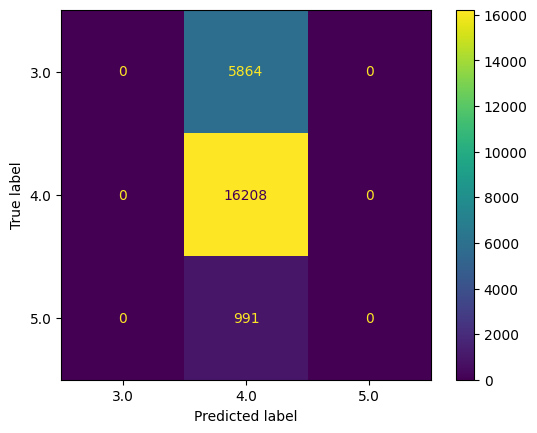

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      5864
         4.0       0.70      1.00      0.83     16208
         5.0       0.00      0.00      0.00       991

    accuracy                           0.70     23063
   macro avg       0.23      0.33      0.28     23063
weighted avg       0.49      0.70      0.58     23063



array([4., 4., 4., ..., 4., 4., 4.])

In [31]:
# 0R
zero_r = DummyClassifier(strategy='most_frequent')
cross_val(zero_r, X, y)
cv_evaluate(zero_r, X, y)

DecisionTreeClassifier prediction took 19.714357137680054 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0                0.0           0.825356                0.0       0.702644
1                0.0           0.825356                0.0       0.702644
2                0.0           0.825356                0.0       0.702644
3                0.0           0.825567                0.0       0.702949
4                0.0           0.825567                0.0       0.702949
5                0.0           0.825567                0.0       0.702949
6                0.0           0.825567                0.0       0.702949
7                0.0           0.825567                0.0       0.702949
8                0.0           0.825267                0.0       0.702515
9                0.0           0.825267                0.0       0.702515


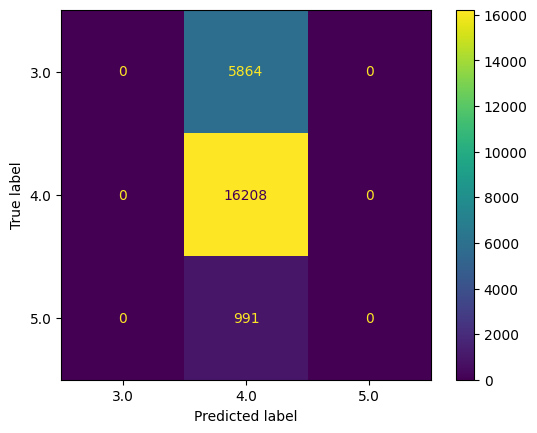

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      5864
         4.0       0.70      1.00      0.83     16208
         5.0       0.00      0.00      0.00       991

    accuracy                           0.70     23063
   macro avg       0.23      0.33      0.28     23063
weighted avg       0.49      0.70      0.58     23063



array([4., 4., 4., ..., 4., 4., 4.])

In [35]:
# 1R
one_r = DecisionTreeClassifier(max_depth=1)
cross_val(one_r, X_ohe_full, y)
cv_evaluate(one_r, X_ohe_full, y)